# Three-Dimensional Plotting in Matplolib

Matplotlib was initially desinged with only two-dimensional plotting in mind. Some three-dimensional plotting utilities were built on top of Matplolib's two-dimensional display, and the result is a convenient set of tools for three-dimensional data visualization. Three dimensional pltos are enabled by importing the `mplot3d` toolkit, included with the main Matplotlib installation:

In [2]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword `projection='3d'` to any of the normal axes creation routines:

In [3]:
%matplotlib notebook 
import numpy as np 
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


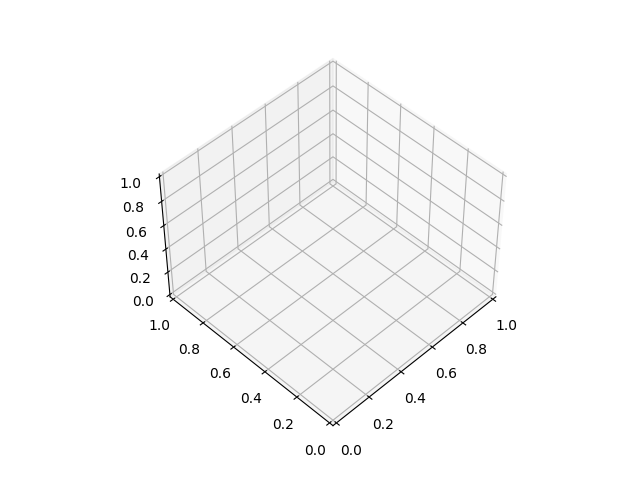

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Whit this three-dimensional axes enabled, we can now plot a variety of three-dimensonal plot types. Three-dimensional plotting is one of the functionalities that benefits immetnsely from viewing figures in teractively rather than statically in the notebook; recall that to sue interactive figures, you can sue `%matplotlib notebook` reather than %matplotlib inline` when running this code

## Three-dimensional Points and Lines

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples. In analogy with the more common two-dimensional pltos discusses earlier, these can be created using the `ax.plot3D` and `ax.scatter3D` functions. The call signature for these is nearly identical to that of their two-dimensional coounterparts.

<IPython.core.display.Javascript object>


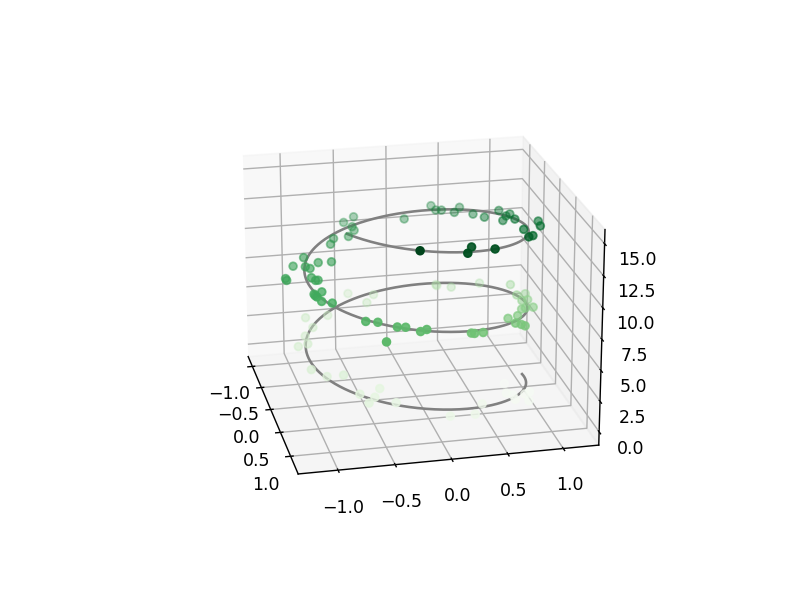

In [5]:
ax = plt.axes(projection='3d')

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)

ax.plot3D(xline, yline, zline, 'gray')

# dat afor three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page. While the three-dimensional effect is sometiems difficult to see within a stati image, an interactive view can lead to some nice intuition about the layout of the points.

## Three-dimensional Countour Plots

Analogous to the countour plots we explored, `mplot3d` contains tools tocreate three-dimensional relief plots using the same inputs. 
Like two-dimensional `ax.contour` plots, `ax.contour3D` requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point. Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function:

In [13]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

<IPython.core.display.Javascript object>


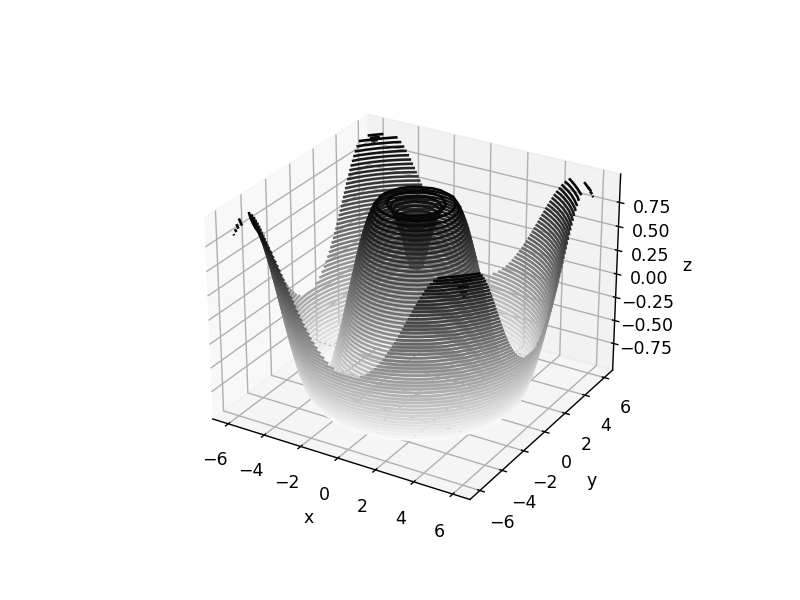

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Sometimes the default viewing angle is not optimal, in which case we can use the `view_init` method to set theelevation and azimuthal angles. Iin the following example, we'll use an elevation of 60 degrees and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about hte z-axis):

<IPython.core.display.Javascript object>


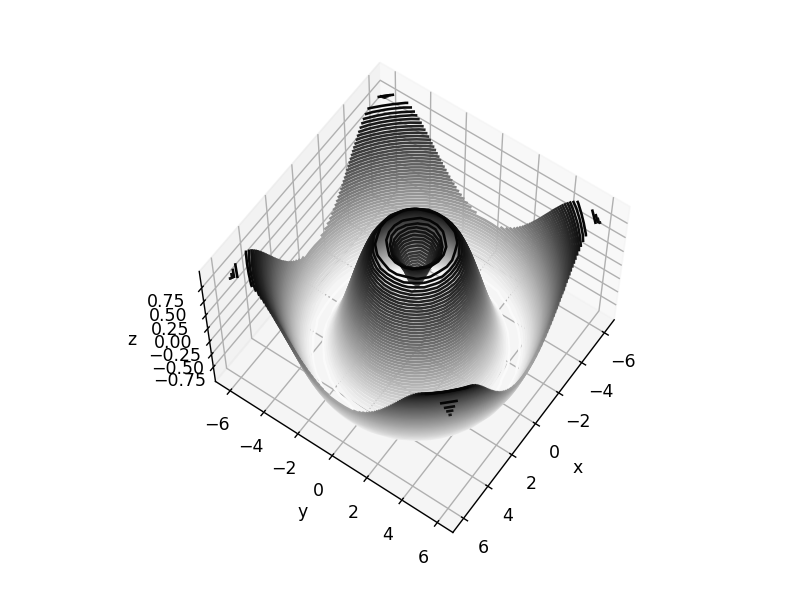

In [16]:
ax.view_init(60, 35)
fig